In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sklearn
import json
import matplotlib.pyplot as plt
import seaborn as sns

#np.set_printoptions(suppress=True)

In [2]:
# upload data
data = pd.read_csv('data/digit.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, pixel 1,1 to label
dtypes: float64(784), int64(1)
memory usage: 59.9 MB


In [4]:
data.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


## 원핫인코딩

In [5]:
x = data.drop('label', axis=1)
y = data['label']

In [6]:
pd.set_option('display.max_rows', 28*28)
x.iloc[0]

pixel 1,1      0.000000
pixel 1,2      0.000000
pixel 1,3      0.000000
pixel 1,4      0.000000
pixel 1,5      0.000000
pixel 1,6      0.000000
pixel 1,7      0.000000
pixel 1,8      0.000000
pixel 1,9      0.000000
pixel 1,10     0.000000
pixel 1,11     0.000000
pixel 1,12     0.000000
pixel 1,13     0.000000
pixel 1,14     0.000000
pixel 1,15     0.000000
pixel 1,16     0.000000
pixel 1,17     0.000000
pixel 1,18     0.000000
pixel 1,19     0.000000
pixel 1,20     0.000000
pixel 1,21     0.000000
pixel 1,22     0.000000
pixel 1,23     0.000000
pixel 1,24     0.000000
pixel 1,25     0.000000
pixel 1,26     0.000000
pixel 1,27     0.000000
pixel 1,28     0.000000
pixel 2,1      0.000000
pixel 2,2      0.000000
pixel 2,3      0.000000
pixel 2,4      0.000000
pixel 2,5      0.000000
pixel 2,6      0.000000
pixel 2,7      0.000000
pixel 2,8      0.000000
pixel 2,9      0.000000
pixel 2,10     0.000000
pixel 2,11     0.000000
pixel 2,12     0.000000
pixel 2,13     0.000000
pixel 2,14     0

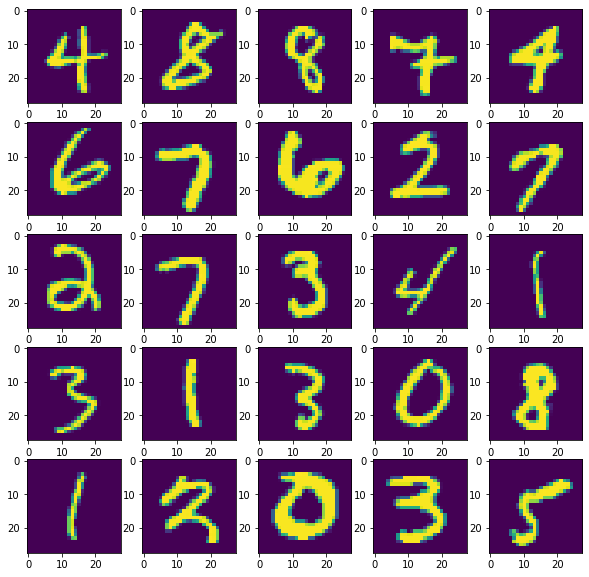

In [7]:
# DataFrame index로 보려면 iloc 써줘야한다

x.iloc[0], y[0]
fig, axes = plt.subplots(5, 5, figsize=(10,10))
for i in range(25):
    img = np.reshape(x.iloc[i].values, (28, 28))
    axes[i//5, i%5].imshow(img)
#plt.tight_layout()
plt.show()


In [8]:
y = pd.get_dummies(y)
y[:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0


## 테스트 데이터 나누기

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [10]:
x_train.shape, y_train.shape

((8000, 784), (8000, 10))

## 모델 학습시키기

In [11]:
# create model
# multi-class classification
 
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28*28)))
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(32, activation='relu'))
# model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
# 다중분류이므로 손실함수는 categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=100,)

Epoch 1/100
250/250 [==============================] - 0s 920us/step - loss: 0.0968 - accuracy: 0.9769
Epoch 2/100
250/250 [==============================] - 0s 860us/step - loss: 0.0962 - accuracy: 0.9778
Epoch 3/100
250/250 [==============================] - 0s 904us/step - loss: 0.0948 - accuracy: 0.9775
Epoch 4/100
250/250 [==============================] - 0s 856us/step - loss: 0.0947 - accuracy: 0.9774
Epoch 5/100
250/250 [==============================] - 0s 759us/step - loss: 0.0949 - accuracy: 0.9784
Epoch 6/100
250/250 [==============================] - 0s 771us/step - loss: 0.0943 - accuracy: 0.9783
Epoch 7/100
250/250 [==============================] - 0s 759us/step - loss: 0.0934 - accuracy: 0.9790
Epoch 8/100
250/250 [==============================] - 0s 840us/step - loss: 0.0929 - accuracy: 0.9791
Epoch 9/100
250/250 [==============================] - 0s 759us/step - loss: 0.0927 - accuracy: 0.9786
Epoch 10/100
250/250 [==============================] - 0s 811us/step - l

In [20]:
y_pred = model.predict(x_test)
y_pred
np.argmax(y_pred[:5], axis=1)

array([3, 8, 9, 1, 3], dtype=int64)

In [21]:
y_test[:5]

,0,1,2,3,4,5,6,7,8,9
6487,0,0,0,0,0,0,0,1,0,0
8785,0,0,0,0,0,0,0,0,1,0
7390,0,0,0,0,0,0,0,0,0,1
7078,0,1,0,0,0,0,0,0,0,0
1230,0,0,0,1,0,0,0,0,0,0


In [22]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 565us/step - loss: 0.4868 - accuracy: 0.8970


[0.4867960214614868, 0.8970000147819519]

## 내가 쓴 숫자 맞추기

In [23]:
import cv2 as cv

In [24]:
def getImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    image = cv.resize(image, (28, 28))
    image = image.astype('float32')
    image = 255-image
    image /= 255

    return image

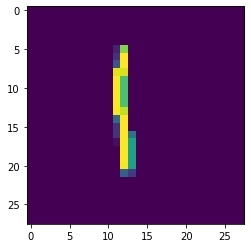

In [48]:
img = getImage('data/1.png')
plt.imshow(img)

In [49]:
y_pred = model.predict(img.reshape(1, 28*28))
np.argmax(y_pred, axis=1)

array([5], dtype=int64)